# Checking Data and CIGALE's output

In [1]:
# Regular packages

import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, Column
import os
from matplotlib.legend_handler import HandlerPathCollection
import pandas as pd

%matplotlib inline

In [70]:
# COSMOS and GOODSS CIGALE output
# Results and Mock data after fitting Ha, Hb, and OIII lines

COSMOS_HaOIII_results = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                           'Ha_OII_Samples-Morphology/COSMOS_HaOIII/results.fits', format = 'fits')
COSMOS_HaOIII_mock = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                           'Ha_OII_Samples-Morphology/COSMOS_HaOIII/results_mock.fits', format = 'fits')

GOODSS_HaOIII_results = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                           'Ha_OII_Samples-Morphology/GOODSS_HaOIII/results.fits', format = 'fits')
GOODSS_HaOIII_mock = Table.read('/home/jvilla/Documents/PhD_2018/3DHST_Data/COSMOS_GOODS-S_MosphoXray_Sample/'
                           'Ha_OII_Samples-Morphology/GOODSS_HaOIII/results_mock.fits', format = 'fits')

In [71]:
COSMOS_HaOIII_results['bayes.param.IRX'][np.isneginf(COSMOS_HaOIII_results['bayes.param.IRX'])] = -99.999
COSMOS_HaOIII_mock['bayes.param.IRX'][np.isneginf(COSMOS_HaOIII_mock['bayes.param.IRX'])] = -99.999

GOODSS_HaOIII_results['bayes.param.IRX'][np.isneginf(GOODSS_HaOIII_results['bayes.param.IRX'])] = -99.999
GOODSS_HaOIII_mock['bayes.param.IRX'][np.isneginf(GOODSS_HaOIII_mock['bayes.param.IRX'])] = -99.999

In [51]:
COSMOS_HaOIII_results_bayes = ['bayes.attenuation.E_BV_factor','bayes.attenuation.E_BV_lines',\
                               'bayes.attenuation.FUV','bayes.attenuation.V_B90',\
                               'bayes.attenuation.powerlaw_slope','bayes.dust.alpha',\
                               'bayes.dust.qpah','bayes.dust.umin','bayes.nebular.logU',\
                               'bayes.param.IRX','bayes.sfh.age_burst','bayes.sfh.age_main',\
                               'bayes.sfh.f_burst','bayes.sfh.tau_main','bayes.dust.luminosity',\
                               'bayes.dust.mass','bayes.sfh.sfr10Myrs','bayes.stellar.m_gas',\
                               'bayes.stellar.m_star']

COSMOS_HaOIII_results_best = ['best.attenuation.E_BV_factor','best.attenuation.E_BV_lines',\
                               'best.attenuation.FUV','best.attenuation.V_B90',\
                               'best.attenuation.powerlaw_slope','best.dust.alpha',\
                               'best.dust.qpah','best.dust.umin','best.nebular.logU',\
                               'best.param.IRX','best.sfh.age_burst','best.sfh.age_main',\
                               'best.sfh.f_burst','best.sfh.tau_main','best.dust.luminosity',\
                               'best.dust.mass','best.sfh.sfr10Myrs','best.stellar.m_gas',\
                               'best.stellar.m_star']

                               
# COSMOS_HaOIII_results_bayes = ['bayes.IRAC1','bayes.IRAC2','bayes.IRAC3','bayes.IRAC4',\
#                                'bayes.UKIRT_WFCJ','bayes.WFCAM_K','bayes.cfht.megacam.u','bayes.cfht.wircam.H',\
#                                'bayes.galex.NUV','bayes.herschel.pacs.100','bayes.herschel.pacs.160',\
#                                'bayes.herschel.spire.PLW','bayes.herschel.spire.PMW','bayes.herschel.spire.PSW',\
#                                'bayes.line.H-beta','bayes.line.NII-654.8+line.H-alpha+line.NII-658.4',\
#                                'bayes.line.OIII-500.7','bayes.spitzer.mips.24','bayes.subaru.hsc.y',\
#                                'bayes.subaru.suprime.B','bayes.subaru.suprime.V','bayes.subaru.suprime.i',\
#                                'bayes.subaru.suprime.r','bayes.subaru.suprime.z']

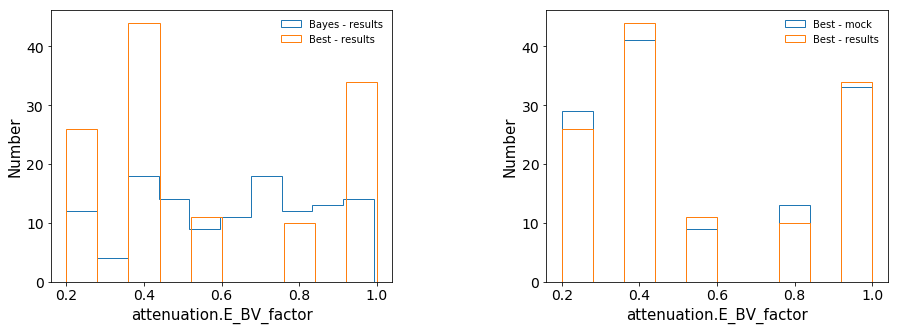

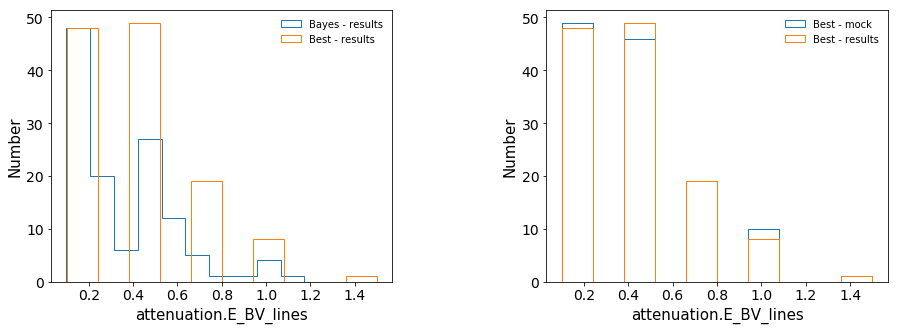

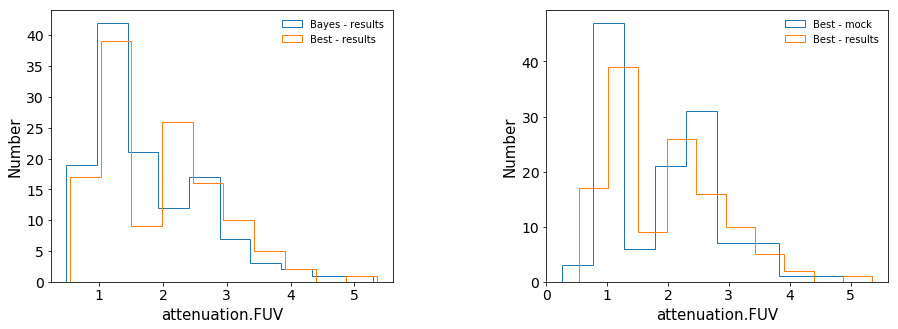

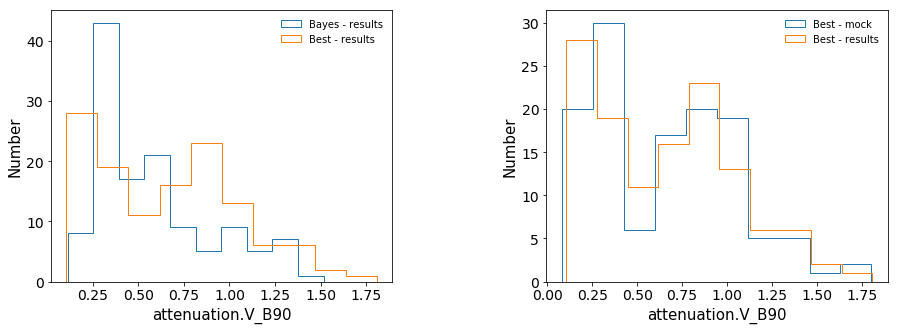

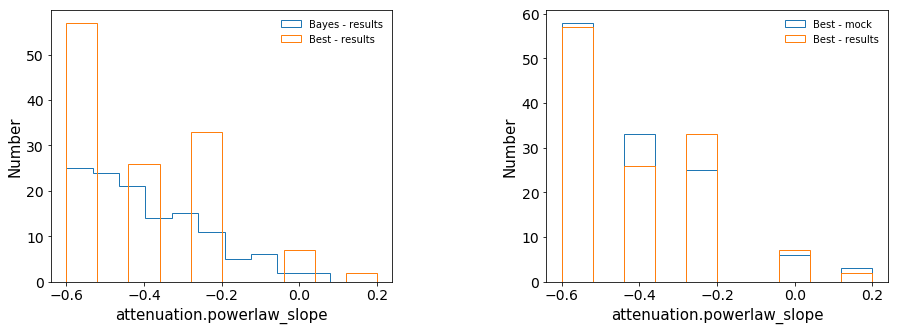

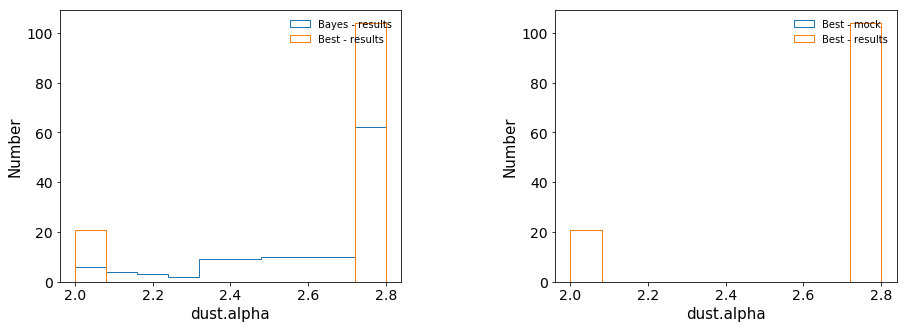

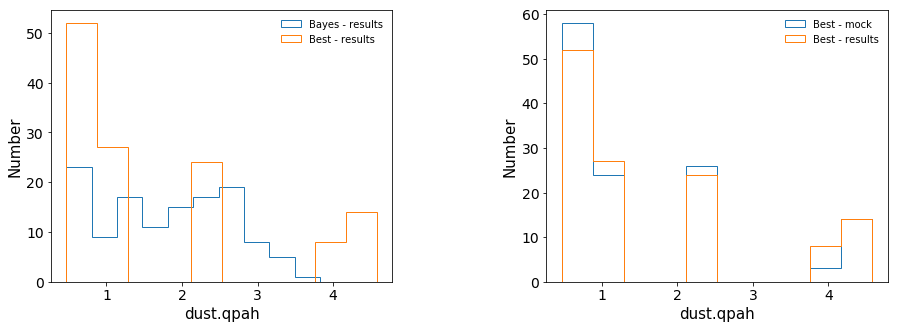

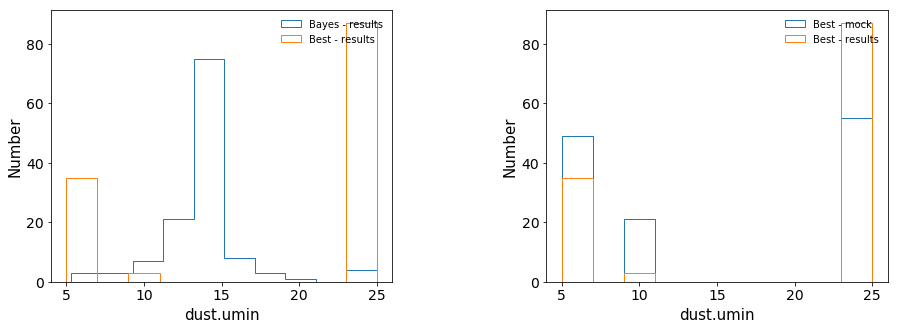

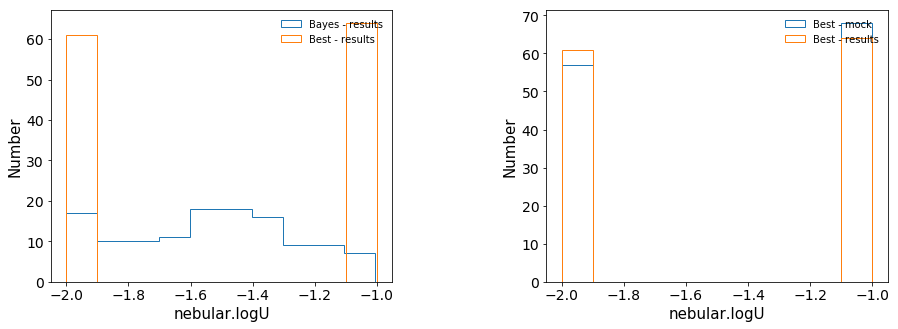

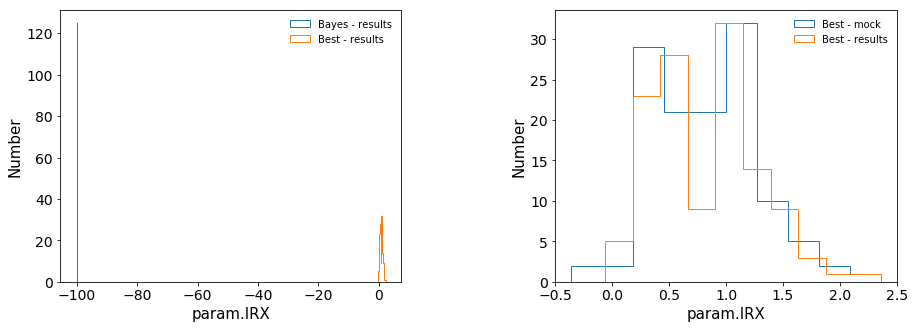

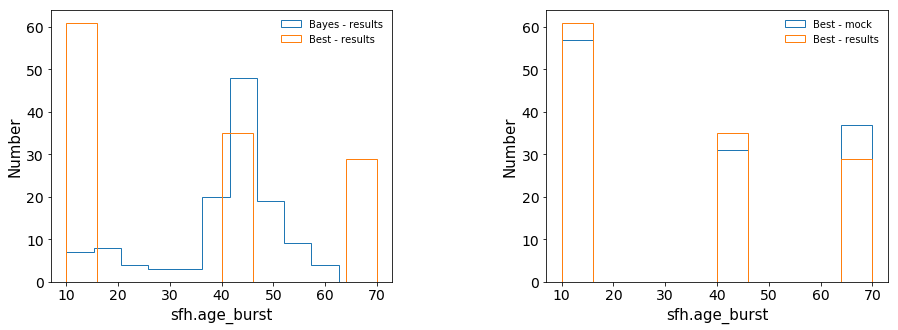

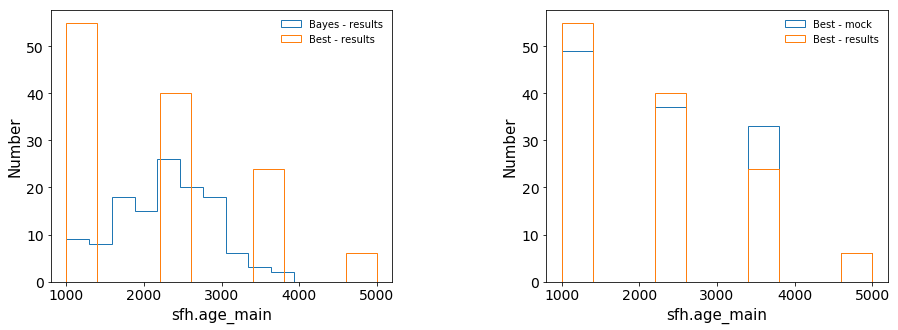

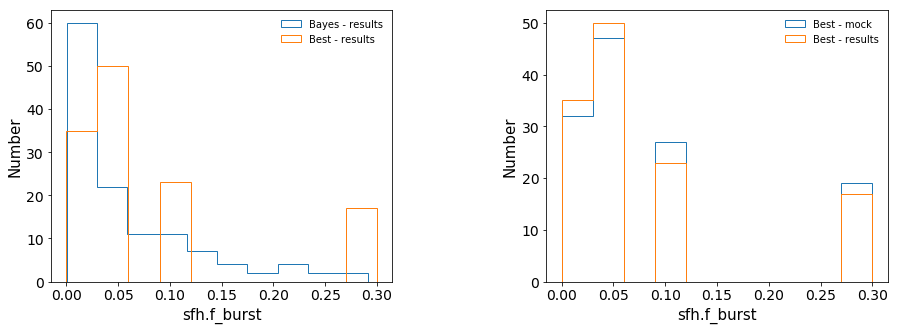

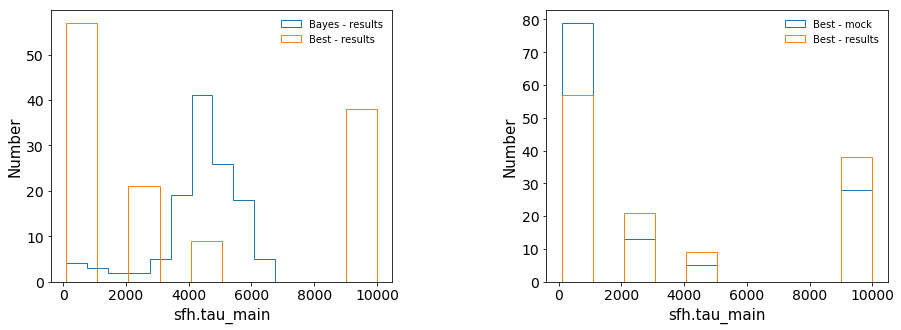

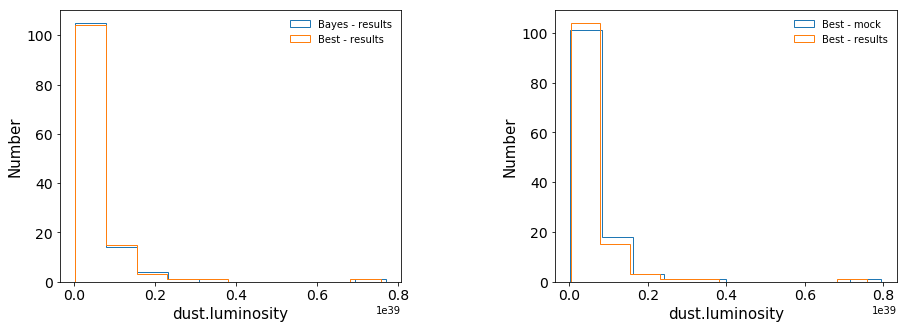

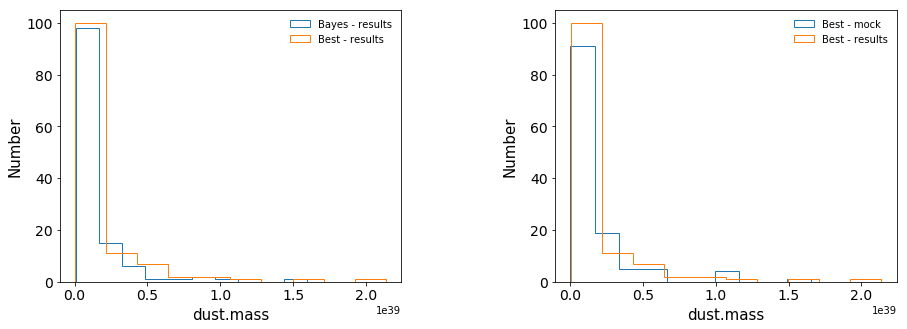

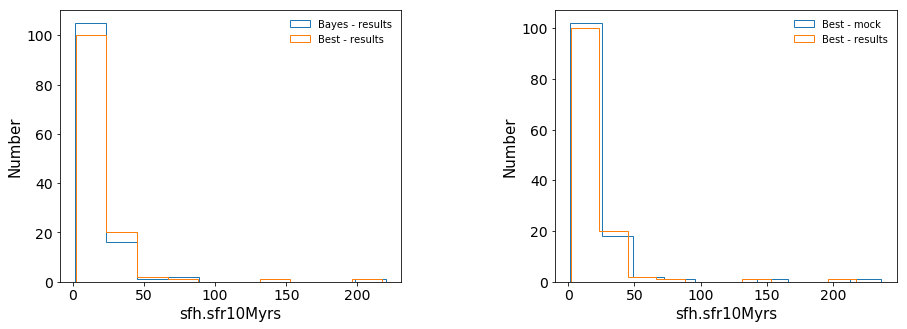

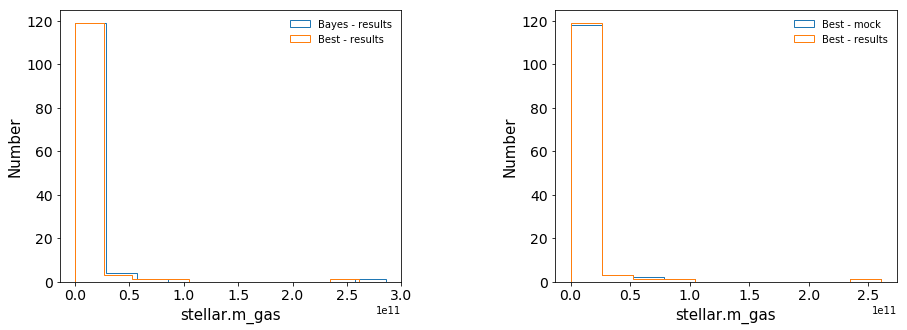

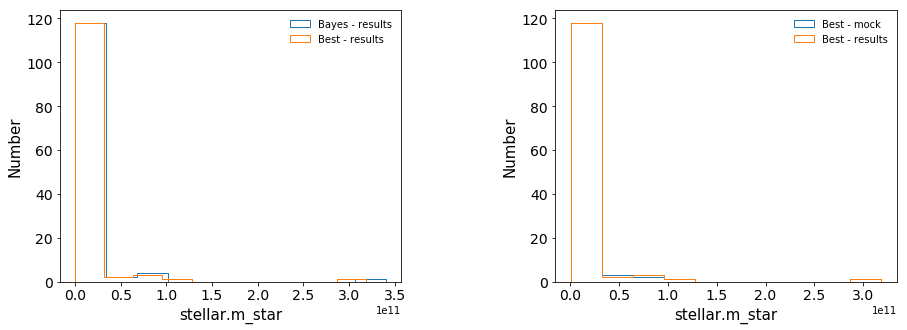

In [72]:
for i in range(len(COSMOS_HaOIII_results_bayes)):
    
    fig, axs = plt.subplots(1,2, figsize=(15, 5), facecolor='w', edgecolor='k')
    fig.subplots_adjust(hspace = 0.3, wspace = 0.45)

    axs = axs.ravel()
    
    axs[0].hist(COSMOS_HaOIII_results[COSMOS_HaOIII_results_bayes[i]], histtype = 'step', label = 'Bayes - results')
    axs[0].hist(COSMOS_HaOIII_results[COSMOS_HaOIII_results_best[i]], histtype = 'step', label = 'Best - results')   
    axs[0].set_xlabel('%s'%COSMOS_HaOIII_results_bayes[i][6::], fontsize = 15)
    axs[0].set_ylabel('Number', fontsize = 15)
    axs[1].hist(COSMOS_HaOIII_mock[COSMOS_HaOIII_results_best[i]], histtype = 'step', label = 'Best - mock') 
    axs[1].hist(COSMOS_HaOIII_results[COSMOS_HaOIII_results_best[i]], histtype = 'step', label = 'Best - results')
    axs[1].set_xlabel('%s'%COSMOS_HaOIII_results_bayes[i][6::], fontsize = 15)
    axs[1].set_ylabel('Number', fontsize = 15)
    
    axs[0].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[0].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'upper right')
    
    axs[1].tick_params(axis = 'both', which = 'major', labelsize = 14)
    axs[1].legend(frameon = False, prop = {'size': 10}, markerscale = 3 , loc = 'upper right')